In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client, performance_report
# local
sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities, sidm_processor, scaleout
# always reload local modules to pick up changes during development
importlib.reload(utilities)
importlib.reload(sidm_processor)
importlib.reload(scaleout)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm

In [2]:
client = scaleout.make_dask_client("tls://localhost:8786")
client

Connection method: Direct,
Dashboard: /user/dongyub.lee@cern.ch/proxy/8787/status,
Comm: tls://192.168.235.126:8786,Workers: 0
Dashboard: /user/dongyub.lee@cern.ch/proxy/8787/status,Total threads: 0
Started: 5 hours ago,Total memory: 0 B


In [2]:
samples_4mu = [
    
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_500GeV_5p0GeV_80p0mm",   
]


samples_2mu = [
    
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_500GeV_5p0GeV_80p0mm",   
]

samples_bkg = [
    "TTJets",
]

In [ ]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2", max_files=-1, location_cfg="signal_4mu_v10.yaml")
fileset_2mu = utilities.make_fileset(samples_2mu, "llpNanoAOD_v2", max_files=-1, location_cfg="signal_2mu2e_v10.yaml")
fileset_bkg = utilities.make_fileset(samples_bkg, "llpNanoAOD_v2", max_files=-1, location_cfg="backgrounds.yaml")

fileset_4mu['TTJets'] = fileset_bkg['TTJets']
fileset_2mu['TTJets'] = fileset_bkg['TTJets']

runner = processor.Runner(
    # executor=processor.DaskExecutor(client=client),
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
#    maxchunks=10,
    skipbadfiles=True
)

channels = [
    "base",
]

p = sidm_processor.SidmProcessor(
    channels,
    ["base"],
)

output_4mu = runner.run(fileset_4mu, treename="Events", processor_instance=p)
output_2mu = runner.run(fileset_2mu, treename="Events", processor_instance=p)

out_4mu = output_4mu["out"]
out_2mu = output_2mu["out"]

Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered 
in divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered 
in divide
  result = getattr(ufunc, method)(

Output()

Output()

In [ ]:
samples_4mu = [
    "TTJets",
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_500GeV_5p0GeV_80p0mm",   
]


samples_2mu = [
    "TTJets",
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_500GeV_5p0GeV_80p0mm",   
]

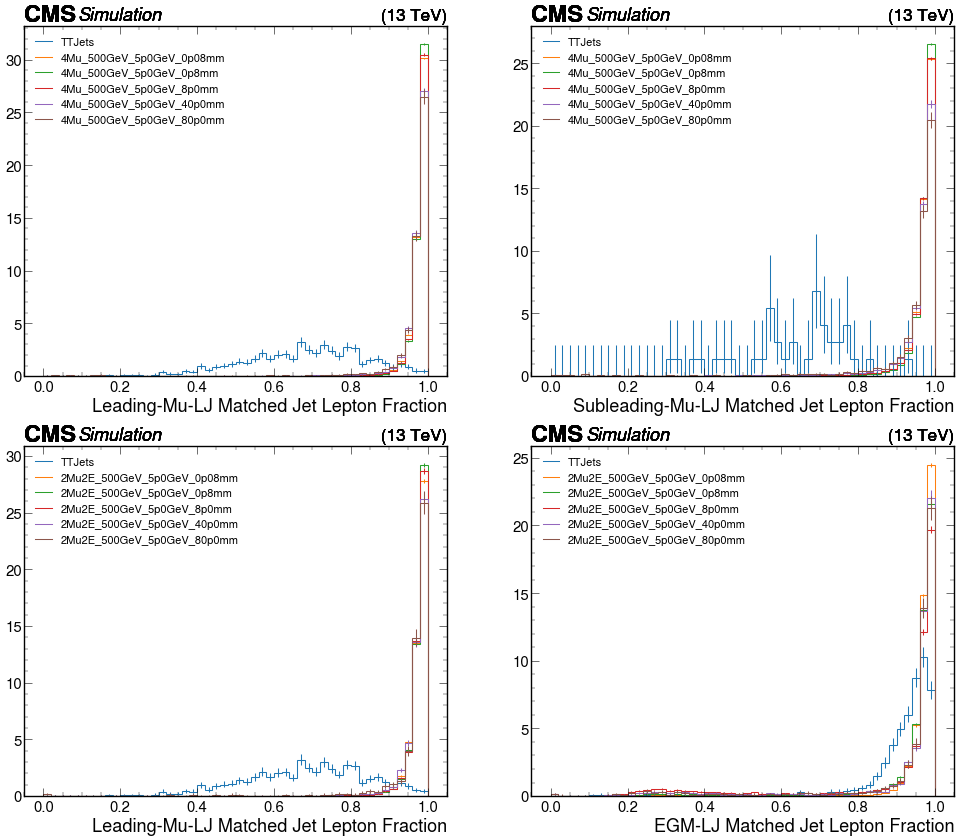

In [12]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=2, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_mu_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=2, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=2, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_matchedjet_lep_fraction"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=2, prop={'size': 16})

In [ ]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["mu_matchedjet_chEmEF"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,3,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["mu_matchedjet_neEmEF"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,3,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["mu_matchedjet_muEF"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,3,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_matchedjet_chEmEF"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,3,5)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_matchedjet_neEmEF"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,3,6)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_matchedjet_muEF"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

In [ ]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["mu_matchedjet_chHEF"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,2,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["mu_matchedjet_neHEF"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,2,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_matchedjet_chHEF"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,2,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_matchedjet_neHEF"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

In [27]:
samples_2mu = [
    "2Mu2E_500GeV_0p25GeV_0p004mm",
    "2Mu2E_500GeV_0p25GeV_4p0mm",   
]

In [28]:
fileset_2mu = utilities.make_fileset(samples_2mu, "llpNanoAOD_v2", max_files=-1, location_cfg="signal_2mu2e_v10.yaml")

fileset_2mu['TTJets'] = fileset_bkg['TTJets']

runner = processor.Runner(
    executor=processor.DaskExecutor(client=client),
    # executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
#    maxchunks=10,
    skipbadfiles=True
)

channels = [
    "base",
]

p = sidm_processor.SidmProcessor(
    channels,
    ["lj_iso_base"],
)

output_2mu = runner.run(fileset_2mu, treename="Events", processor_instance=p)

out_2mu = output_2mu["out"]

In [29]:
samples_2mu = [
    "TTJets",
    "2Mu2E_500GeV_0p25GeV_0p004mm",
    "2Mu2E_500GeV_0p25GeV_4p0mm",   
]

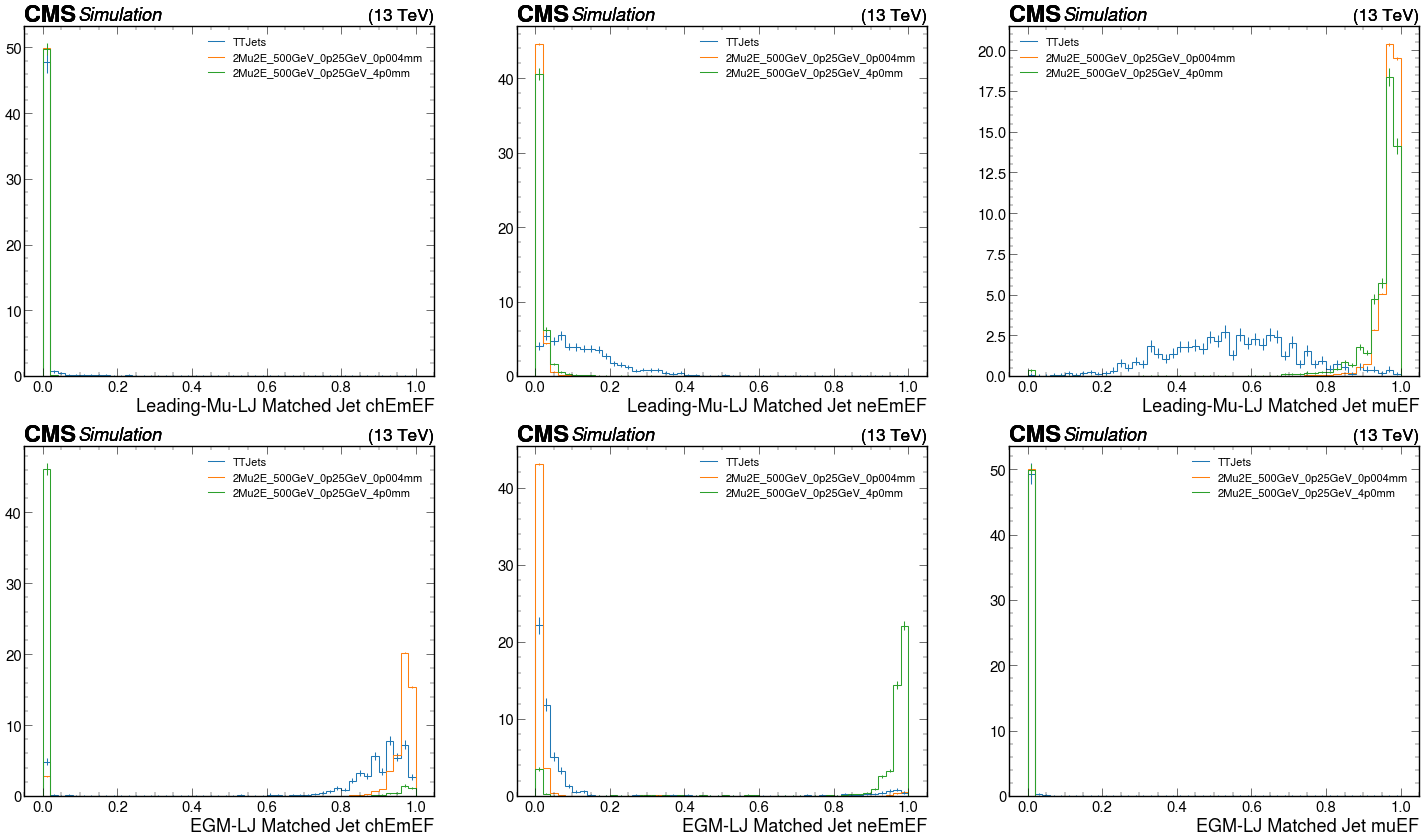

In [30]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_matchedjet_chEmEF"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,3,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_matchedjet_neEmEF"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,3,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_matchedjet_muEF"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=2, prop={'size': 16})

plt.subplot(2,3,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_matchedjet_chEmEF"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,3,5)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_matchedjet_neEmEF"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,3,6)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_matchedjet_muEF"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

In [22]:
samples_2mu = [
    "2Mu2E_100GeV_5p0GeV_0p4mm",
    "2Mu2E_100GeV_5p0GeV_400mm",   
    
    "2Mu2E_1000GeV_5p0GeV_0p04mm",
    "2Mu2E_1000GeV_5p0GeV_40p0mm",
]

In [15]:
fileset_2mu = utilities.make_fileset(samples_2mu, "llpNanoAOD_v2", max_files=-1, location_cfg="signal_2mu2e_v10.yaml")

fileset_2mu['TTJets'] = fileset_bkg['TTJets']

runner = processor.Runner(
    executor=processor.DaskExecutor(client=client),
    # executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
#    maxchunks=10,
    skipbadfiles=True
)

channels = [
    "base",
]

p = sidm_processor.SidmProcessor(
    channels,
    ["lj_iso_base"],
)

output_2mu = runner.run(fileset_2mu, treename="Events", processor_instance=p)

out_2mu = output_2mu["out"]

In [23]:
samples_2mu = [
    "TTJets",
    "2Mu2E_100GeV_5p0GeV_0p4mm",
    "2Mu2E_100GeV_5p0GeV_400mm",   
]

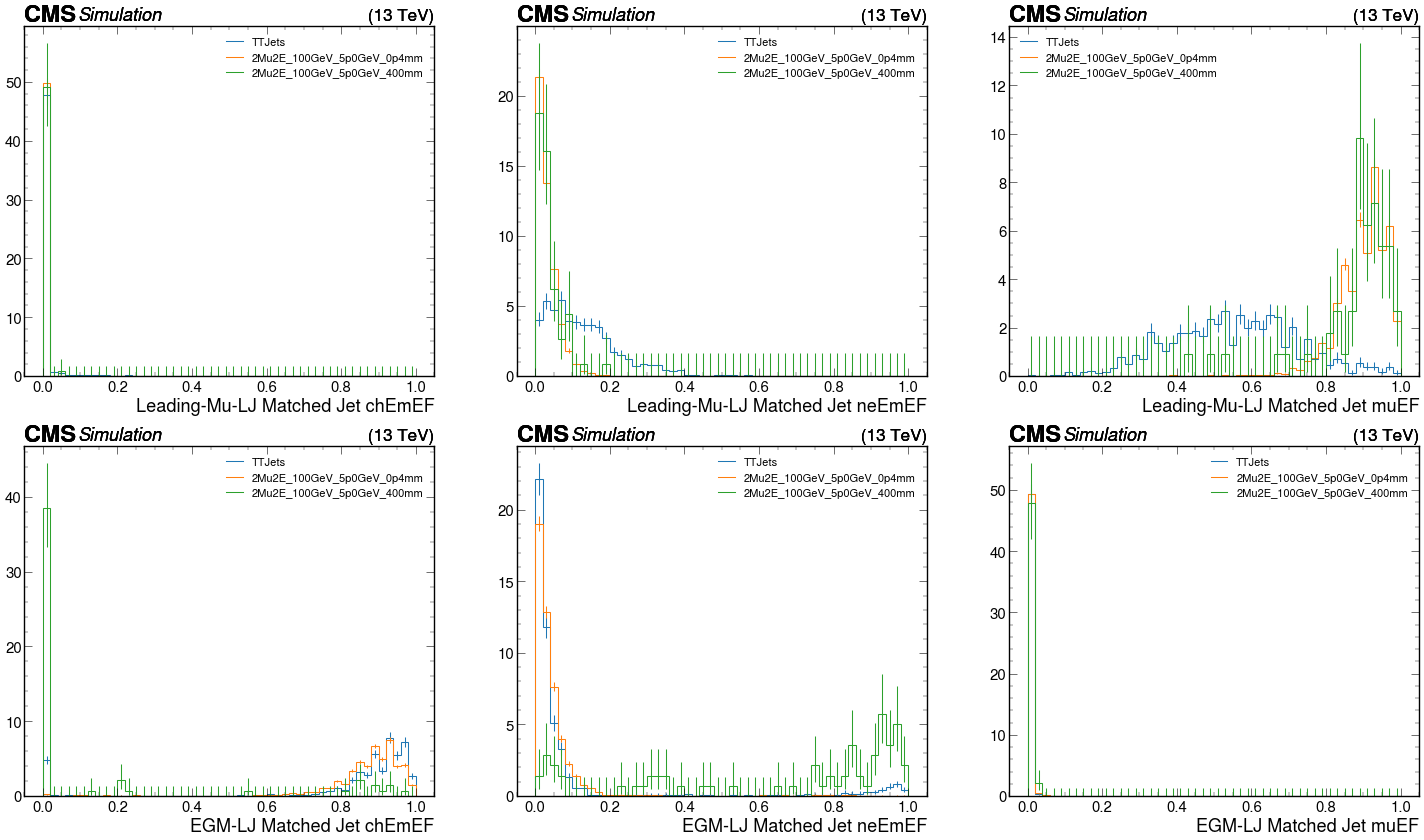

In [24]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_matchedjet_chEmEF"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,3,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_matchedjet_neEmEF"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,3,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_matchedjet_muEF"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=2, prop={'size': 16})

plt.subplot(2,3,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_matchedjet_chEmEF"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,3,5)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_matchedjet_neEmEF"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,3,6)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_matchedjet_muEF"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

In [25]:
samples_2mu = [
    "TTJets",

    "2Mu2E_1000GeV_5p0GeV_0p04mm",
    "2Mu2E_1000GeV_5p0GeV_40p0mm",   
]

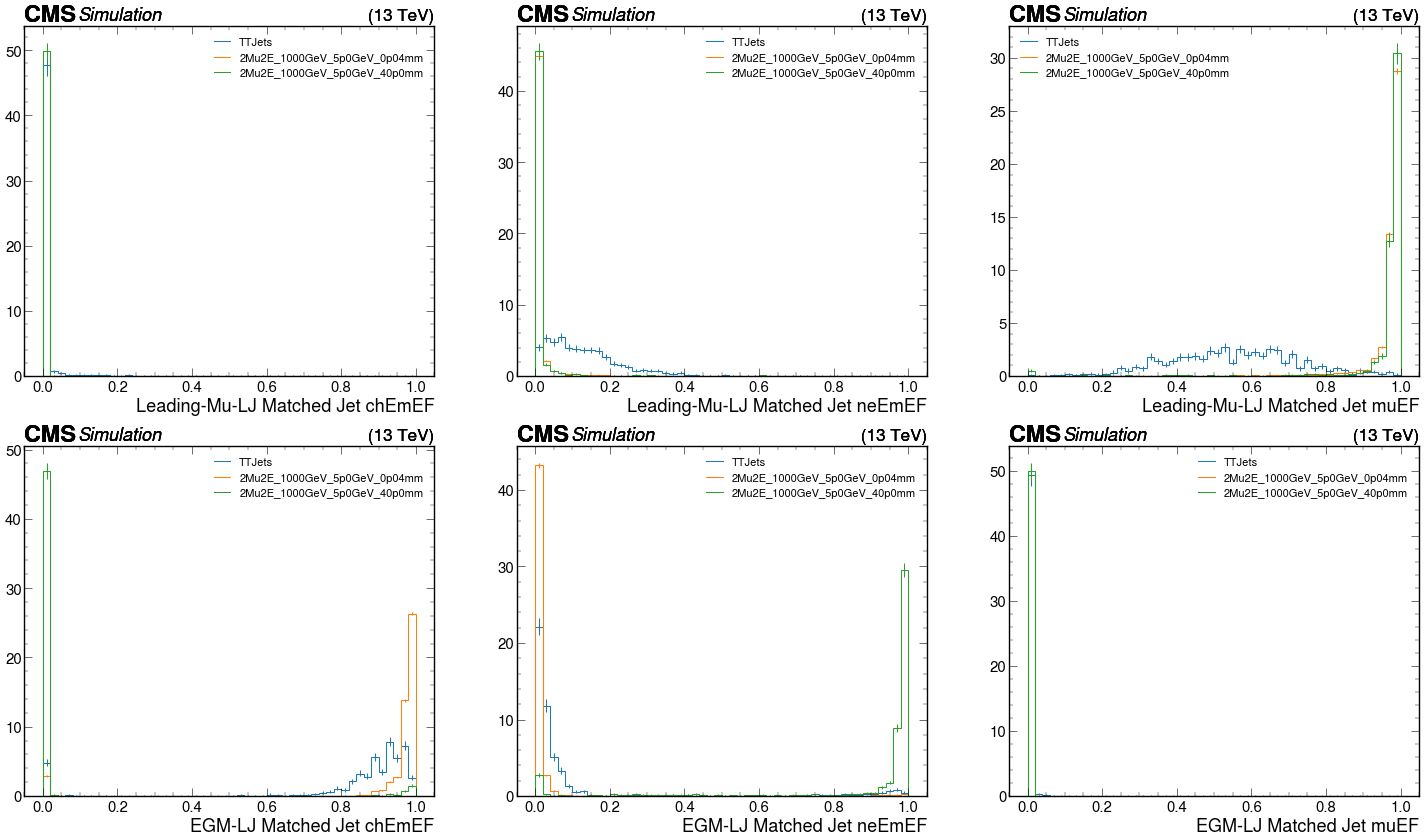

In [26]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_matchedjet_chEmEF"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,3,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_matchedjet_neEmEF"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,3,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_matchedjet_muEF"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=2, prop={'size': 16})

plt.subplot(2,3,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_matchedjet_chEmEF"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,3,5)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_matchedjet_neEmEF"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})

plt.subplot(2,3,6)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_matchedjet_muEF"][channels[0], :], density=True)
plt.legend(samples_2mu, loc=1, prop={'size': 16})